In [6]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gamma

In [1]:
# Fetching data
# the url of the data.csv on github
url_data = (r'https://raw.githubusercontent.com/mrc-ide/Brazil_COVID19_distributions/52241f817d74b96a7df0a82dff5b770b5caf7914/data/onset-to-death.csv')

# importing as a dataframe
data_csv = pd.read_csv(url_data)

# extracting the data as a numpy array
data = data_csv.loc[(data_csv["Start_date"] >= "2020-04-01")  
                    & (data_csv["Start_date"] <= "2020-04-30") 
                    & (data_csv["State"] == "SP")
                    & (data_csv["onset-to-death"] > 0) ]["onset-to-death"].to_numpy()

# Step 1: MoM

Use the method of moments estimator for the values of $\theta$ and $\alpha$.

For the method of moments of the Gamma distribution we have that
$$\mu_1 = \alpha\theta$$
and
$$\mu_2 = \alpha (1 + \alpha) \theta^2 $$

Thus we have

$$ \mu_2 - \mu_1^2 = \alpha\theta^2 = \mu_1\theta $$

We note that $m_2 - m_1^2$ is the sample variance and $\mu_1$ the sample mean.

In [4]:
# Find sample mean and var

samp_mean = data.mean()
samp_var = data.var()

# Find alpha and theta
theta_hat = samp_var / samp_mean
alpha_hat = samp_mean / theta_hat

theta_hat, alpha_hat


(8.764398286570675, 1.919070267750832)

# Step 2: Newton-Rhapson

For the general Newton-Rhapson method we have that
$$x_{i+1} = x_i + \frac{f(x_i)}{f'(x_i)}$$

We let

# Step 3: Graphing

Plot the density histogram of the data against the pdf ’s of gamma distributions found in Steps 1 and 2.

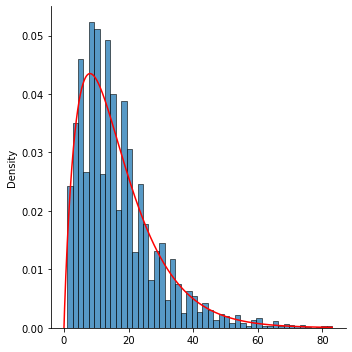

In [12]:
sns.displot(data=data, stat='density')

x = np.linspace(0, np.max(data), data.size)
y = gamma.pdf(x, a=alpha_hat, scale=theta_hat)

plt.plot(x,y,color='red')
plt.show()